### MQL 
A Marketing Qualified Lead (MQL) is a lead who has indicated interest in what a brand has to offer based on marketing efforts or is otherwise more likely to become a customer than other leads. 

Often an MQL is a lead who has intentionally engaged with your brand by performing actions like voluntarily submitting contact information, opting into a program, adding e-commerce items to a shopping cart, downloading materials, or repeatedly visiting a website.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import datetime as dt

## Import Data

In [2]:
mql = pd.read_csv("MQL.csv")
mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2/1/18,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,10/20/17,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,3/22/18,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,1/22/18,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2/21/18,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [3]:
mql.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,f25000058f3f4c0a7440f8e34a98a6f9,5/2/18,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


##### The firs dataset
- 4 variables; 8000 data points
- MQL_id(marketing qualified leads)
- First contact date
- Landing page that captured the leads
- lead origin (the channel that brings the leads to the landing pages)

In [4]:
close = pd.read_csv('Closed_Deal.csv')
close.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2/26/18 19:58,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,5/8/18 20:17,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,6/5/18 17:27,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,1/17/18 13:51,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,7/3/18 20:17,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0


#### The second dataset
- 842 observations with 14 variables
- seller_id (used in Olist platform)
- sdr_id and sr_id(the sales development representative and sales representative that were in charge of the deal)
- won_date, business segment, lead_type, lead_behaviour_profile, business_type, declared_monthly_revenue

In [5]:
close.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
mql_id                           842 non-null object
seller_id                        842 non-null object
sdr_id                           842 non-null object
sr_id                            842 non-null object
won_date                         842 non-null object
business_segment                 841 non-null object
lead_type                        836 non-null object
lead_behaviour_profile           665 non-null object
has_company                      63 non-null object
has_gtin                         64 non-null object
average_stock                    66 non-null object
business_type                    832 non-null object
declared_product_catalog_size    69 non-null float64
declared_monthly_revenue         842 non-null int64
dtypes: float64(1), int64(1), object(12)
memory usage: 92.2+ KB


In [6]:
close['declared_monthly_revenue'].value_counts()

0           797
100000        5
10000         3
30000         3
25000         3
20000         3
50000         2
5000          2
15000         2
60000         2
300000        2
250000        2
120000        2
500000        1
6             1
40000         1
210000        1
50000000      1
4000          1
130000        1
200000        1
8000          1
150000        1
8000000       1
6000          1
180000        1
1000          1
Name: declared_monthly_revenue, dtype: int64

has_company, has_gtin, average_stock,declared_product_catalog_size,and declared monthly revenus have too many Null values that they cannot bring value to the analysis

In [7]:
#ecommerce data
order_item = pd.read_csv("olist_order_items_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
category = pd.read_csv("product_category_name_translation.csv")

In [8]:
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
close

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2/26/18 19:58,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,5/8/18 20:17,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,6/5/18 17:27,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,1/17/18 13:51,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,7/3/18 20:17,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,8/1/18 20:22,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,9/27/18 18:58,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,6/6/18 20:15,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,3/6/18 15:52,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0


In [13]:
#merge the two tables
data = pd.merge(mql, close, how = "left", on = "mql_id")
data.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2/1/18,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,10/20/17,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,3/22/18,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,1/22/18,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2/21/18,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2/26/18 19:58,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [14]:
data['lost'] = data['won_date'].notnull()

In [15]:
data['lost']

0       False
1       False
2       False
3       False
4        True
        ...  
7995    False
7996    False
7997    False
7998    False
7999     True
Name: lost, Length: 8000, dtype: bool

## Exploratiry Data Analysis

In [16]:
mql['first_contact_date'] = pd.to_datetime(mql['first_contact_date'])
mql.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [17]:
num_mql = mql.set_index('first_contact_date')['mql_id']

In [18]:
num_mql = num_mql.groupby(pd.Grouper(freq = "M")).count()
num_mql

first_contact_date
2017-06-30       4
2017-07-31     239
2017-08-31     386
2017-09-30     312
2017-10-31     416
2017-11-30     445
2017-12-31     200
2018-01-31    1141
2018-02-28    1028
2018-03-31    1174
2018-04-30    1352
2018-05-31    1303
Freq: M, Name: mql_id, dtype: int64

In [19]:
close['won_date'] = pd.to_datetime(close['won_date'])
num_close = close.set_index('won_date')['mql_id']
num_close = num_close.groupby(pd.Grouper(freq = 'M')).count()
num_close

won_date
2017-12-31      3
2018-01-31     73
2018-02-28    113
2018-03-31    147
2018-04-30    207
2018-05-31    122
2018-06-30     57
2018-07-31     37
2018-08-31     33
2018-09-30     23
2018-10-31     21
2018-11-30      6
Freq: M, Name: mql_id, dtype: int64

Text(0.5, 1.0, 'Number of MQL')

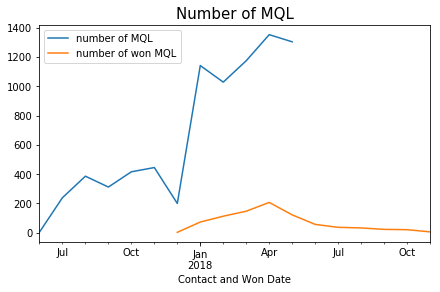

In [20]:
plt.figure(figsize = (7,4))
num_mql.plot(label = 'number of MQL')
num_close.plot(label = 'number of won MQL')
plt.xlabel('Contact and Won Date')
plt.legend()
plt.title("Number of MQL", size = 15)

#### The number of MQL
The MQL data is provided from 06/2017 to 05/2018, while the won MQL is provided from 12/2017 to 11/2018. In 2017, Olist Marketing team generated MQLs around 400MQLs/month. In 2018, they boost the number to 1000 - 1400 leads per month. Regarding the won MQL, its peak was at Apr. 2018 with 200 won opportunities.

In [21]:
mql_origin = mql.groupby('origin').agg({'mql_id':"count"}).sort_values(by = 'mql_id',ascending=False)
mql_origin

,mql_id
origin,
organic_search,2296
paid_search,1586
social,1350
unknown,1099
direct_traffic,499
email,493
referral,284
other,150
display,118


In [22]:
origin = list(mql_origin.index)
origin

['organic_search',
 'paid_search',
 'social',
 'unknown',
 'direct_traffic',
 'email',
 'referral',
 'other',
 'display',
 'other_publicities']

Text(0.5, 1.0, 'Number of MQL by channels')

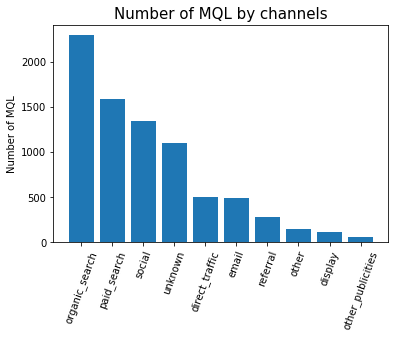

In [23]:
plt.figure(figsize = (6,4))
plt.bar(mql_origin.index,mql_origin['mql_id'])
plt.xticks(rotation = 70)
plt.ylabel('Number of MQL')
plt.title("Number of MQL by channels", size =15)

#### Channels:
The majority of MQLs come from organic search channel, folled by direct traffic and social. 
'Other', 'other publicities'and 'display' are the sources that bring the least MQLs to Olist.

Text(0.5, 1.0, 'Number of MQL by channels overtime')

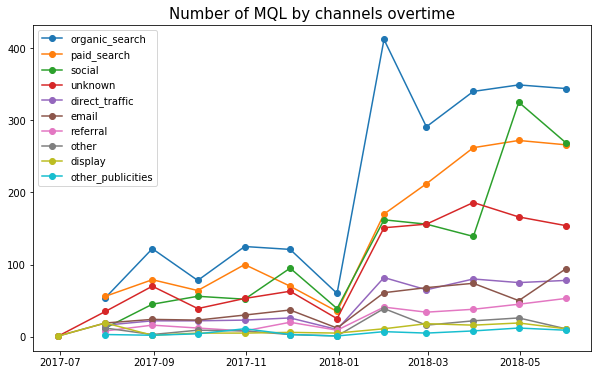

In [24]:
plt.figure(figsize = (10,6))
fancy_plot = plt.subplot()
for i in origin:
    channel =mql[mql['origin'] == i]
    channel = channel.set_index('first_contact_date')['mql_id']
    channel_agg = channel.groupby(pd.Grouper(freq = 'M')).count()    
    fancy_plot.plot(channel_agg.index, channel_agg, "-o", label = i)
fancy_plot.legend()
plt.title('Number of MQL by channels overtime', size = 15)

From above graph, The organic search MQL shows a significantly increased in 2018-02 and declined after that. This tendency could be the result of a big event/PR campaign.

Text(0.5, 1.0, 'Won rate by channel')

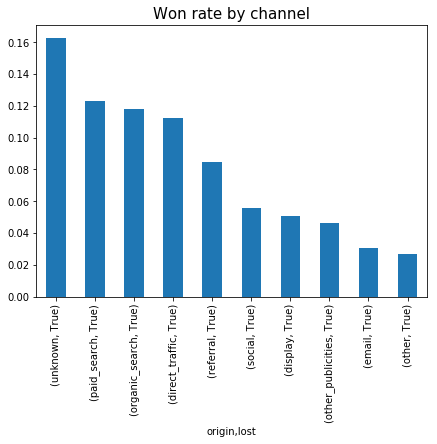

In [25]:
#Opportunity won rate by channel
data_origin = data[["origin","lost", 'mql_id']]
origin_lost = data_origin.groupby(['origin','lost']).count()
sum_origin = data_origin.groupby(['origin']).count()
percentage = (origin_lost/sum_origin).iloc[1::2].sort_values(by = ['mql_id'],ascending=False)['mql_id']
plt.figure(figsize = (7,5))
percentage.plot(kind = 'bar')
plt.title("Won rate by channel", size = 15)

Organic_search, paid_search and direct traffic are the sources that enjoy the highest conversion rates(12.5%, 11.5%, and 11% respectively).

Email, other_publicties and social have the lowest conversion rate(3%, 5%, 5.5% respectively). 

This means that SEO and Google Adwords are the most effective marketing channels for Olist. This result seems to be relevant to a couple of surveys illustrating the most effective marketing channel for B2B companies.

### Landing Page
 Even though the sales team is responsible for converting an MQL into a won opportunity, the marketing team can affect this likelihood from the top of the funnel by providing relevant messaging and benefits on the landing pages.

In [26]:
mql_lp = mql.groupby('landing_page_id').agg({'mql_id':"count"})
mql_lp = mql_lp[mql_lp['mql_id'] > 30]
data_lp = pd.merge(data, mql_lp, how = "inner", left_on = "landing_page_id", right_index = True)
lp_lost = data_lp.groupby(['landing_page_id', 'lost']).agg({'mql_id_x':"count"})
landing_page = list(mql_lp.index)

percentage_lp = []
landing_page_2 = []
Num_mql = []
for i in landing_page:
    if mql_lp.loc[i][0] == lp_lost.loc[i].loc[False][0]:
        lp_lost.drop([i])
    else:
        pct = lp_lost.loc[i].loc[True][0]/(lp_lost.loc[i].loc[False][0]+lp_lost.loc[i].loc[True][0])
        percentage_lp.append(pct)
        landing_page_2.append(i)
        Num_mql.append(mql_lp.loc[i][0])

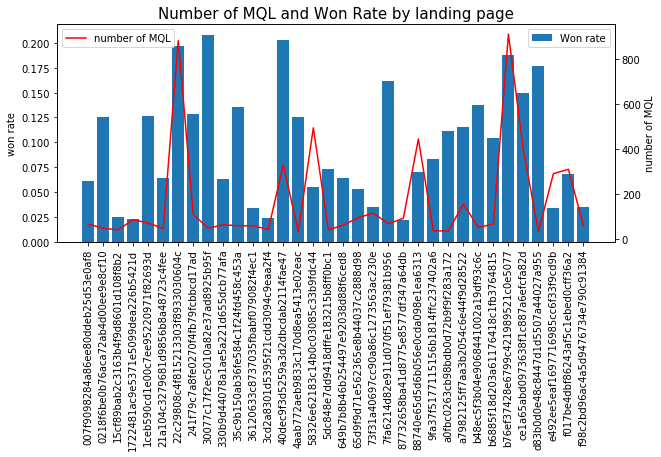

In [27]:
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(landing_page_2, percentage_lp, label = "Won rate")

ax2.plot(landing_page_2, Num_mql, color = "red", label = "number of MQL")

ax.set_ylabel('won rate')
ax.legend()

ax2.set_ylabel('number of MQL')
ax2.legend()
plt.title("Number of MQL and Won Rate by landing page", size = 15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

From figure above, there are two landing pages that have a very high number of MQLs(800 MQLs) as well as very high won rate(20%), meaning that 20% of the MQLs captured from these landing pages become Olist's sellers. Learning from these landing pages can help Olist to replicate the success to other landing pages. 

### Targeting - Business Segment 
Targeting is very important in B2B marketing. There're segments that will be very interested in Olist and vice versa.

In [28]:
data2 = pd.merge(mql, close, how = "right", on = "mql_id")
data2['sales cycle'] = (data2['won_date'] - data2['first_contact_date']).dt.days

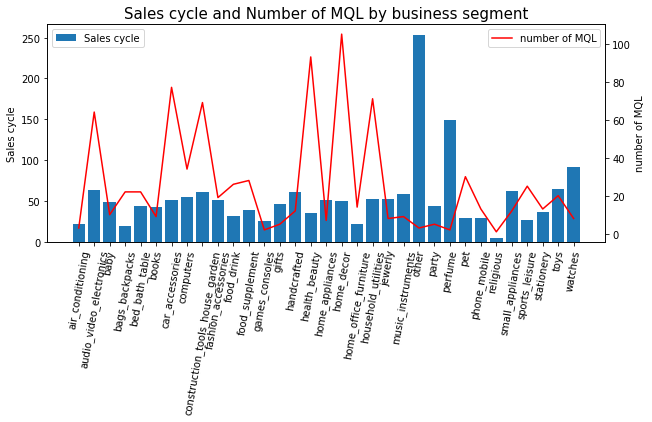

In [29]:
#sales cycle by Business Segment 
segment_time = data2.groupby(['business_segment']).agg({"mql_id":"count", "sales cycle":"mean"})

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(segment_time.index, segment_time['sales cycle'], label = "Sales cycle")

ax2.plot(segment_time.index, segment_time['mql_id'], color = "red", label = "number of MQL")

ax.set_ylabel('Sales cycle')
ax.legend(loc = "upper left")

ax2.set_ylabel('number of MQL')
ax2.legend()
plt.title("Sales cycle and Number of MQL by business segment", size = 15)
for tick in ax.get_xticklabels():
    tick.set_rotation(80)

The above graph shows that by using the sales cycle(how long the sales process is) as the indication: 
Busness segment such as Home_decor, health_beauty, household_utilities, construction tool for house and garden, car accessories and electronics are the majorities of the sellers with the sales cycle typically around 50 days. Some segments that have a long sales cycle than others are perfume and watches. However, since these 2 segments only have a small number of MQLs (7 & 10) so Olist should probably wait for more MQLs to have a more accurate observation.

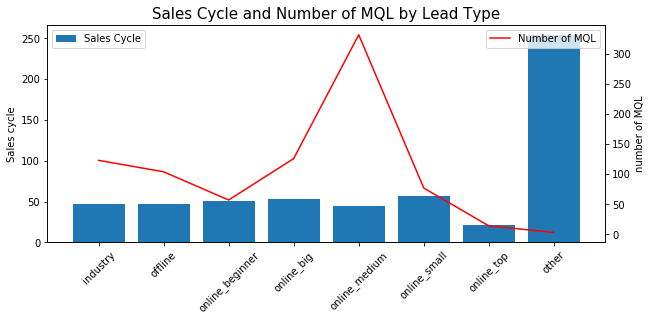

In [30]:
#Sales cycle by lead type
lead_time = data2.groupby(['lead_type']).agg({"mql_id":"count", "sales cycle":"mean"})

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(lead_time.index, lead_time['sales cycle'], label = "Sales Cycle")
ax2.plot(lead_time.index, lead_time['mql_id'], color = "red", label = "Number of MQL")
ax.set_ylabel('Sales cycle')
ax2.set_ylabel('number of MQL')
ax.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.title("Sales Cycle and Number of MQL by Lead Type", size = 15)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

Regarding the Lead_type variable, Online_medium is the most popular type among Olist MQLs. There is no significant difference between the sales cycle of these business types.

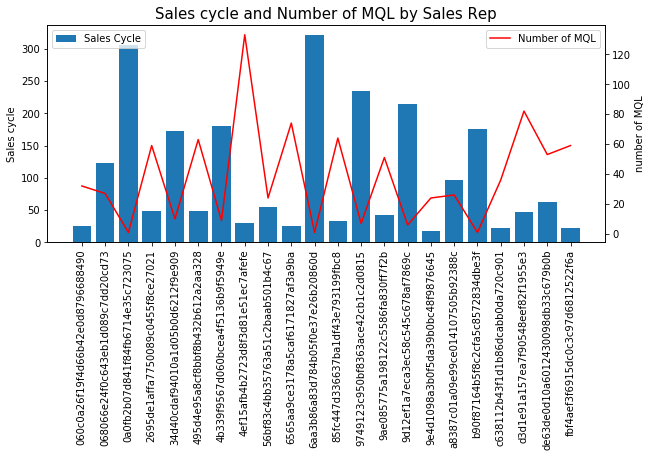

In [31]:
sr_time = data2.groupby(['sr_id']).agg({"mql_id":"count", "sales cycle":"mean"})

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax.bar(sr_time.index, sr_time['sales cycle'], label = "Sales Cycle")
ax2.plot(sr_time.index, sr_time['mql_id'], color = "red", label = "Number of MQL")
ax.set_ylabel('Sales cycle')
ax2.set_ylabel('number of MQL')
ax.legend(loc = "upper left")
ax2.legend(loc = "upper right")
plt.title("Sales cycle and Number of MQL by Sales Rep", size = 15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

Olist can also base on the sales cycle to evaluate the performance of a Sales Rep. From Figure 7, It seems that the number of leads an SR has, the shorter the sales cycle. This can be explained that an experienced sales rep (more MQLs) will perform better (shorter sales length) than a new sales rep.

## Lead Behavior
The table below is the description of each behavior profile, based on DiSC, a behavior assessment tool developed from DiSC theory of psychologist William Moulton Marston.




| Behaviour_profile | DISC_profile |Description |
| :---------------- | :-- | :--- |
| Cat           | Steadiness | Person places emphasis on cooperation, sincerity, dependability |
|Eagle|Influence|Person places emphasis on influencing or persuading others, openness relationships|
|Wolf|Conscientiousness|Person places emphasis on quality and accuracy, expertise, competency|
|Shark|Dominance|Person places emphasis on accomplishing results, the bottom line, confidence|



Text(0.5, 1.0, 'Heatmap of Lead Behaviour Profile and Business Segment')

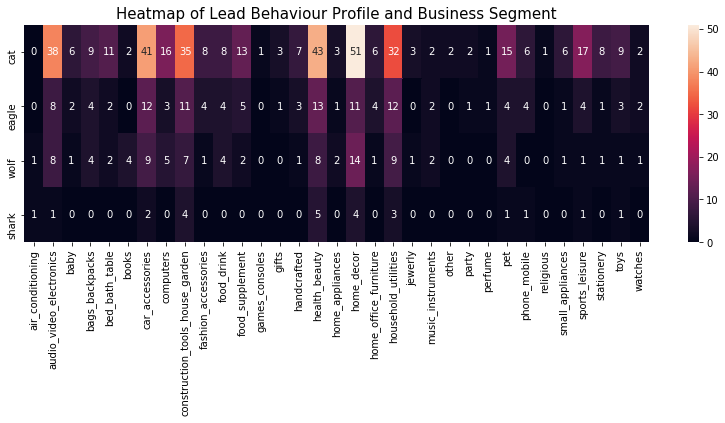

In [32]:
#The number of MQL by lead behaviour profile and buisness segment
segment = pd.DataFrame(index = ['cat','eagle', 'wolf', 'shark'])
for i in segment_time.index:
    lead_profile = close[close['business_segment'] == i]
    segment[i] = lead_profile.groupby('lead_behaviour_profile')['mql_id'].count()
segment = segment.fillna(0)
plt.figure(figsize = (14,4))
snb.heatmap(segment, annot = True)
plt.title("Heatmap of Lead Behaviour Profile and Business Segment", size = 15)    

48.3% of lead behavior profiles are car -- steadiness, meaning that this person places emphasis on cooperation, sincerity, and dependability. Understand the characteristics of the leads can help Olist team to create relevant personas, making it easier for them to craft contents, messaging and stories to the targeted audience.

### Bussiness Type

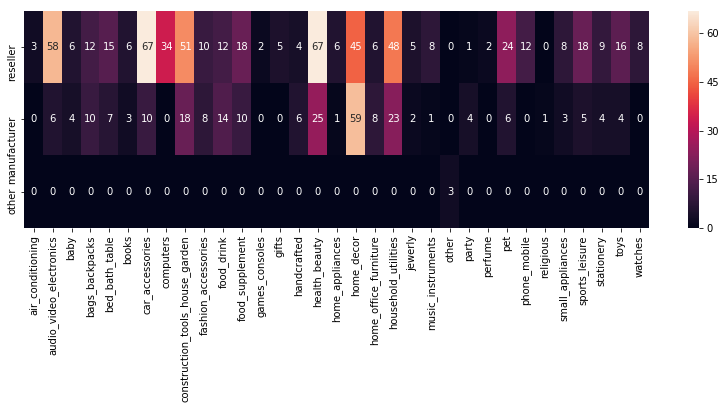

In [33]:
#Number of MQL by lead type and business segments
segment2 = pd.DataFrame(index = ['reseller', 'manufacturer', 'other'])
for i in segment_time.index:
    lead_profile = close[close['business_segment'] == i]
    segment2[i] = lead_profile.groupby('business_type')['mql_id'].count()
segment2.fillna(0,inplace = True)
plt.figure(figsize = (14,4))
snb.heatmap(segment2, annot = True)
plt.savefig("segment_business_type.png")

There are 2 business types: reseller and manufacturer. Reseller accounts for 69.7% of total MQLs. Therefore, there is no surprise when reseller appears the most among the business segments. However, in the home_decor segment, 56% are manufacturers.

### Close deal performance
Time a seller waits for first order

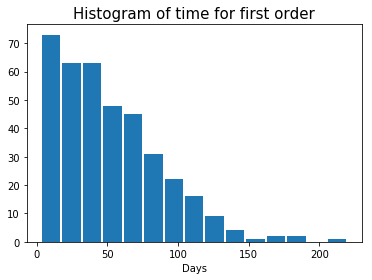

In [34]:
seller = pd.merge(order_item, orders[['order_id','order_approved_at']],
                  how = "left", left_on = "order_id",right_on = "order_id")
seller['order_approved_at'] = pd.to_datetime(seller['order_approved_at'])

seller_first_order = seller.groupby('seller_id').agg({"order_approved_at":"min"})
diff = pd.merge(close, seller_first_order, how = "inner", left_on = "seller_id", right_index = True)

diff['first_order_time'] = diff['order_approved_at'] - pd.to_datetime(diff['won_date'])
diff['first_order_time'] = diff["first_order_time"].dt.days

#Histogram
plt.figure()
plt.hist(diff["first_order_time"], bins = 15, rwidth = 0.9)
plt.title("Histogram of time for first order",size = 15)
plt.xlabel("Days")
plt.show()

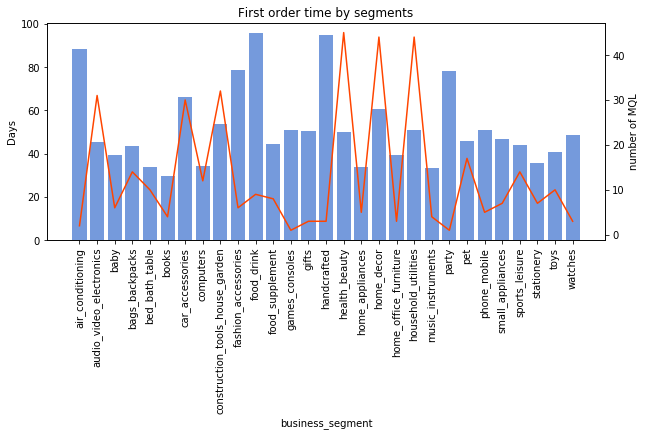

In [36]:
first_order_segment = diff.groupby("business_segment").agg({"first_order_time":"mean", "mql_id":"count"})

fig = plt.figure(figsize = (10,4))
ax = snb.barplot(x = first_order_segment.index, 
            y = first_order_segment['first_order_time'],color = 'cornflowerblue')
ax.set_title('First order time by segments')
ax.twinx()
ax2 = snb.lineplot( x = first_order_segment.index, 
            y = first_order_segment['mql_id'], color = 'orangered')
ax.set_ylabel('Days')
ax2.set_ylabel('number of MQL')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)


### Sales per segments:

In [37]:
product = pd.merge(product[["product_id", "product_category_name"]], category, how = "left", left_on = "product_category_name", 
                   right_on = "product_category_name")
product_by_value = pd.merge(seller, product, how = "left", 
                            left_on = "product_id", right_on = "product_id")

category_sales = product_by_value.groupby("product_category_name_english").agg({"price":"sum"})

top10 = category_sales.sort_values(by = ['price'], ascending = False).head(10)
top10_product = product_by_value[product_by_value['product_category_name_english'].isin(top10.index)]

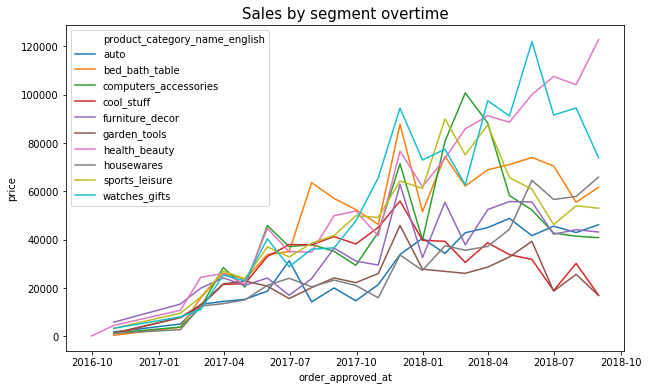

In [38]:
top10_category = top10_product.groupby(["product_category_name_english",pd.Grouper(key = 'order_approved_at',freq = "M")]).agg({"price":"sum"})
top10_category.reset_index(inplace=True)
plt.figure(figsize = (10,6))

snb.lineplot(x = 'order_approved_at', y = 'price',
             hue = 'product_category_name_english',data = top10_category)
plt.title("Sales by segment overtime", size =15)
plt.savefig("Sales by product category.png") 

Figure 12 is the top 10 product categories that have the highest sales from Olist. Since health_beauty, computer_accessories, furniture_devor, housewares, auto, and garden_tools are also the main business segments among MQLs, the sales values from these segments also on top. The only thing that surprises me is Watches. Though only have a small number of sellers from Watches segment, revenue from watches is really high in comparison with other segments.

### Conclusion & Recommendation
We look at Olist seller side marketing from different angles: channels, messages (landing pages), targeting (business segment, lead behavior, business type,..), sales process (sales cycle, sales rep), closed deal performance to indicate the platform usage. Each angle can add value to how the team can optimize marketing campaigns.

Here are some detail recommendations:
- Continue to work on SEO/Events to increase organic traffic
- Learn from successful landing pages to create hypotheses for A/B testing. The goal is to replicate the successes in other landing pages
- Sport leisure and watches segment can be developed more because Olist can capture high revenue from them
- Leads are steadiness type. Olist can build customer persona around these type of people and crafting messaging/content to target these people.
- Investigate in Home_decor segment why it attracts a lot of manufacturers. Can it be replicated in other segments?